# DAML 08 - Unsupervised Learning Exercises - Solutions

Michal Grochmal <michal.grochmal@city.ac.uk>

Using PCA to improve the results of the `kmeans` clustering over the handwritten digits
does not improve the accuracy/F1 score in any meaningful way.
Can we do better using t-SNE since it disengages the number clusters better than PCA?

(★★☆)

This is how the code looks attempting PCA as the preprocessor:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
import seaborn as sns
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, f1_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
model = make_pipeline(PCA(n_components=30), KMeans(n_clusters=10))
clusters = model.fit_predict(digits.data)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
accuracy_score(digits.target, labels), f1_score(digits.target, labels, average='weighted')

(0.7913188647746243, 0.7880855700817373)

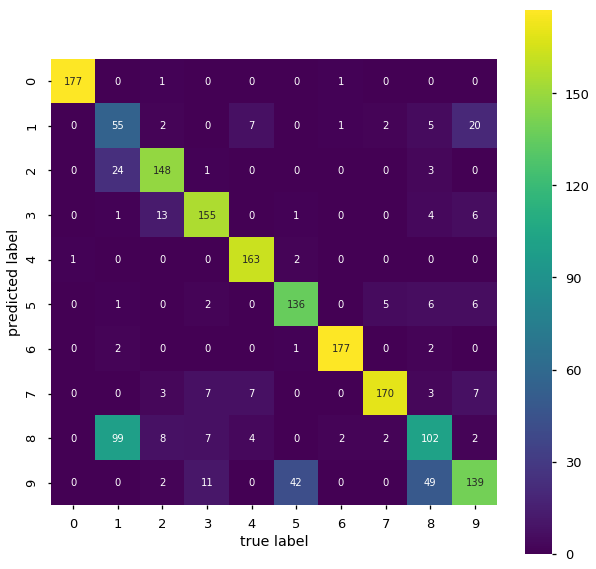

In [4]:
mat = confusion_matrix(digits.target, labels)
fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='viridis',
                 xticklabels=digits.target_names, yticklabels=digits.target_names)
ax.set(xlabel='true label', ylabel='predicted label');

That is not an improvement over the plain `kmeans`, we should try t-SNE.
Yet, the t-SNE manifold technique in `sklearn` works similarly to a clustering algorithm
and is not applicable beyond the data for which it is `fit`.
This is a problem since the default `TSNE` class has only the `fit` and `fit_transform` methods,
and the pipeline model creation requires that all preprocessors implement both `fit` and `transform` methods.

Nothing that we cannot deal with using some hacky Python.
Instead of using plain `TSNE` in your pipeline use the class defined below (remember to execute this cell).

Evaluate one pipeline using our t-SNE with `n_components=2` and one pipeline with `n_components=3`.

In [5]:
class PipeTSNE(TSNE):
    def transform(x):
        return self.fit_transform(x)

In [6]:
model = make_pipeline(PipeTSNE(n_components=2), KMeans(n_clusters=10))
clusters = model.fit_predict(digits.data)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
accuracy_score(digits.target, labels), f1_score(digits.target, labels, average='weighted')

(0.9499165275459098, 0.9493925675105076)

In [7]:
model = make_pipeline(PipeTSNE(n_components=3), KMeans(n_clusters=10))
clusters = model.fit_predict(digits.data)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
accuracy_score(digits.target, labels), f1_score(digits.target, labels, average='weighted')

(0.8948247078464107, 0.8872911883198932)

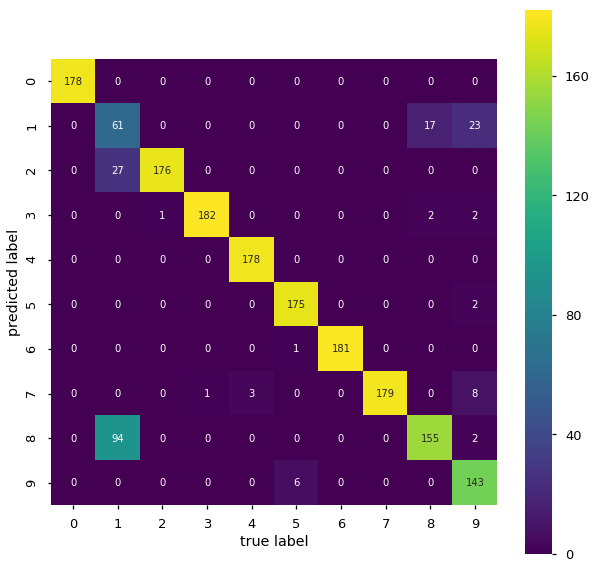

In [8]:
mat = confusion_matrix(digits.target, labels)
fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='viridis',
                 xticklabels=digits.target_names, yticklabels=digits.target_names)
ax.set(xlabel='true label', ylabel='predicted label');

That is a huge improvement over the plain `kmeans` over the handwritten digits!